In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

import tensorflow as tf
from keras import backend as K

In [7]:
def bscall_lookback(S, m, T, t, r, sig):
  tau = T - t
  a1 = (np.log(S/m) + (r+0.5*sig**2)*tau)/(sig*np.sqrt(tau))
  a2 = (np.log(S/m) + (r-0.5*sig**2)*tau)/(sig*np.sqrt(tau))
  a3 = (np.log(S/m) - (r-0.5*sig**2)*tau)/(sig*np.sqrt(tau))
  return S*norm.cdf(a1) - m*np.exp(-r*tau)*norm.cdf(a2) - ((S*sig**2)/2*r)*norm.cdf(-a1) + ((S*sig**2)/2*r)*np.exp(-r*tau)*(m/S)**((2*r)/(sig**2))*norm.cdf(-a3)

## Simulated market data generation

In [8]:
S0 = 1
T = 30/365
r = 0.02
sig = 0.2

M = 50000
N = 200

dt = T/N
rdt = r*dt
sigsdt = sig*np.sqrt(dt)

np.random.seed(1234)

S = np.empty([M,N+1])
rv = np.random.normal(r*dt,sigsdt,[M,N])

for i in range(M):
  S[i,0] = S0
  for j in range(N):
    S[i,j+1] = S[i,j] * (1+rv[i,j])

In [9]:
bscall_lookback(S0, S0, T, 0, r, sig)

0.02369217051308826

## Floating strike call option

In [18]:
floating_call_payoffs = [s[-1] - np.min(s) for s in S]
floating_call_mc_price = np.mean(floating_call_payoffs) * np.exp(-r*T)
print(f'Monte Carlo price : {floating_call_mc_price}')

Monte Carlo price : 0.04358465788722708


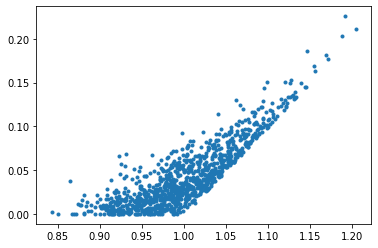

0.04365636281960652
0.035948488305262094


In [11]:
plt.plot(S[0:1000,-1], floating_call_payoffs[0:1000], marker = ".", linestyle='none')
plt.show()
print(np.mean(floating_call_payoffs))
print(np.std(floating_call_payoffs))

## Floating strike put option

In [12]:
floating_put_payoffs = [np.max(s) - s[-1] for s in S]
floating_put_mc_price = np.mean(floating_put_payoffs) * np.exp(-r*T)
floating_put_mc_price

0.04348990221219189

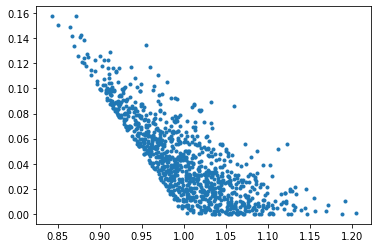

0.04356145125372349
0.033090647668628265


In [13]:
plt.plot(S[0:1000,-1], floating_put_payoffs[0:1000], marker = ".", linestyle='none')
plt.show()
print(np.mean(floating_put_payoffs))
print(np.std(floating_put_payoffs))

## Fixed strike call option

In [14]:
K=1

fixed_call_payoffs = [max(np.max(s)-K,0) for s in S]
fixed_call_mc_price = np.mean(fixed_call_payoffs) * np.exp(-r*T)
fixed_call_mc_price

0.045250628422195745

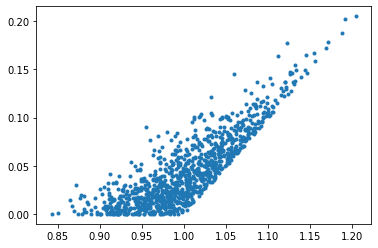

0.04532507418839944
0.0365952799542324


In [15]:
plt.plot(S[0:1000,-1], fixed_call_payoffs[0:1000], marker = ".", linestyle='none')
plt.show()
print(np.mean(fixed_call_payoffs))
print(np.std(fixed_call_payoffs))

## Fixed strike put option

In [16]:
K=1

fixed_put_payoffs = [max(K - np.min(s),0) for s in S]
fixed_put_mc_price = np.mean(fixed_put_payoffs) * np.exp(-r*T)
fixed_put_mc_price

0.041823931677223244

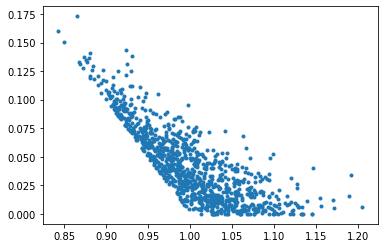

0.04189273988493058
0.032307047525279776


In [17]:
plt.plot(S[0:1000,-1], fixed_put_payoffs[0:1000], marker = ".", linestyle='none')
plt.show()
print(np.mean(fixed_put_payoffs))
print(np.std(fixed_put_payoffs))